In [1]:
if (!require("keras")) install.packages("keras")
library(keras)
if (!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)
if (!require("qdapRegex")) install.packages("qdapRegex")
library(qdapRegex)
if (!require("data.table")) install.packages("data.table")
library(data.table)
if (!require("readr")) install.packages("readr")
library(readr,warn.conflicts = FALSE,quietly = TRUE)
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2,warn.conflicts = FALSE,quietly = TRUE)
if (!require("dplyr")) install.packages("dplyr")
library(dplyr,warn.conflicts = FALSE,quietly = TRUE)
if (!require("tidyr")) install.packages("tidyr")
library(tidyr,warn.conflicts = FALSE,quietly = TRUE)
if (!require("tibble")) install.packages("tibble")
library(tibble,warn.conflicts = FALSE,quietly = TRUE)
if(!require("tidytext")) install.packages("tidytext")
library(tidytext)
if(!require ("wordcloud")) install.packages("wordcloud")
library(wordcloud,warn.conflicts = FALSE,quietly = TRUE)
if(!require ("RColorBrewer")) install.packages("RColorBrewer")
library(RColorBrewer,warn.conflicts = FALSE,quietly = TRUE)
if(!require("reshape2")) install.packages("reshape2")
library(reshape2,warn.conflicts = FALSE,quietly = TRUE)
if (!require("caret")) install.packages("caret")
library(caret) 
library(ROCR)
library(gridExtra)

Loading required package: keras
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.4.2          ✔ dplyr   0.7.4     
✔ tidyr   0.8.0          ✔ stringr 1.2.0     
✔ readr   1.2.0          ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: qdapRegex

Attaching package: ‘qdapRegex’

The following object is masked from ‘package:dplyr’:

    explain

The following object is masked from ‘package:ggplot2’:

    %+%

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: tidytext
Loading required package: wordcloud
Loading require

In [2]:

train_data = read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
test_data = read_csv("../input/jigsaw-toxic-comment-classification-challenge/test.csv")

max_words = 130000
maxl = 200

Parsed with column specification:
cols(
  id = col_character(),
  comment_text = col_character(),
  toxic = col_double(),
  severe_toxic = col_double(),
  obscene = col_double(),
  threat = col_double(),
  insult = col_double(),
  identity_hate = col_double()
)
Parsed with column specification:
cols(
  id = col_character(),
  comment_text = col_character()
)


[1] "toxic 9.58%,severe_toxic 1%,obscene 5.29%,threat 0.3%,insult 4.94%,identity_hate 0.88%"

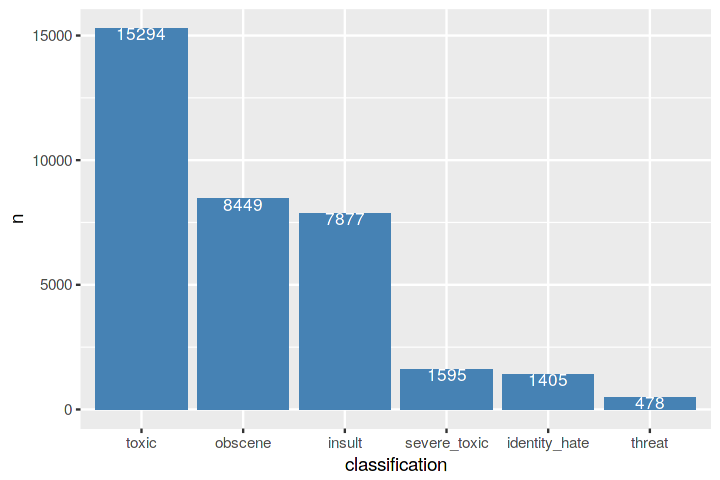

In [3]:
options(repr.plot.width = 6,repr.plot.height=4)

#display percent of dataset that belongs to a certain toxic class
paste(paste0(names(train_data)[3:8]," ",round(100*apply(train_data[,3:8],2,sum)/nrow(train_data),2),"%",collapse = ","))

#Bar plot of class counts
dfm <- data_frame(classification = names(train_data[,3:8]),n=apply(train_data[,3:8],2,sum)) %>% mutate(classification=reorder(classification,-n))
ggplot(data=dfm,aes(x=classification,y=n))+geom_bar(stat="identity",fill = "steelblue")+
    geom_text(aes(label=n),vjust=0.9,color = "white",size = 3.5)

In [4]:
paste0("Comments with more than one class selected: "," ",sum(apply(train_data[,3:8],1,function(x){sum(x)>1})))
paste("Toxic comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$toxic==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse =","))
paste("Obscene comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$obscene ==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse = ","))
paste("insult comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$insult ==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse = ","))
paste("Severe_toxic comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$severe_toxic ==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse = ","))
paste("identity_hate comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$identity_hate ==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse = ","))
paste("threat comment along with other classes: ",paste(paste0(names(train_data[,3:8])," ",round(100*apply(train_data[train_data$threat ==1,3:8],2,sum)/apply(train_data[,3:8],2,sum)),"%"),collapse = ","))

[1] "Comments with more than one class selected:  9865"

[1] "Toxic comment along with other classes:  toxic 100%,severe_toxic 100%,obscene 94%,threat 94%,insult 93%,identity_hate 93%"

[1] "Obscene comment along with other classes:  toxic 52%,severe_toxic 95%,obscene 100%,threat 63%,insult 78%,identity_hate 73%"

[1] "insult comment along with other classes:  toxic 48%,severe_toxic 86%,obscene 73%,threat 64%,insult 100%,identity_hate 83%"

[1] "Severe_toxic comment along with other classes:  toxic 10%,severe_toxic 100%,obscene 18%,threat 23%,insult 17%,identity_hate 22%"

[1] "identity_hate comment along with other classes:  toxic 9%,severe_toxic 20%,obscene 12%,threat 21%,insult 15%,identity_hate 100%"

[1] "threat comment along with other classes:  toxic 3%,severe_toxic 7%,obscene 4%,threat 100%,insult 4%,identity_hate 7%"

In [5]:
tidy_text <- train_data  %>%
  select(id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate) %>%
  unnest_tokens(word, comment_text)

In [105]:
head(tidy_text)

id,toxic,severe_toxic,obscene,threat,insult,identity_hate,word
0000997932d777bf,0,0,0,0,0,0,explanation
0000997932d777bf,0,0,0,0,0,0,why
0000997932d777bf,0,0,0,0,0,0,the
0000997932d777bf,0,0,0,0,0,0,edits
0000997932d777bf,0,0,0,0,0,0,made
0000997932d777bf,0,0,0,0,0,0,under


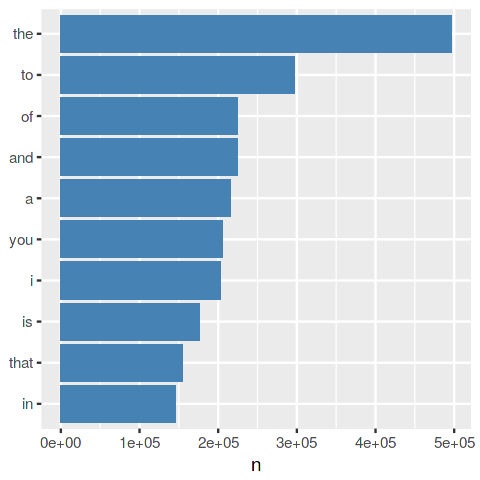

In [6]:
options(repr.plot.width=4,repr.plot.height=4)

tidy_text %>%
    count(word,sort=TRUE) %>%
    head(10) %>%
    mutate(word = reorder(word,n)) %>%
    ggplot(aes(word,n)) +
    geom_col(fill="steelblue") +
    xlab(NULL) +
    coord_flip()

Joining, by = "word"
Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

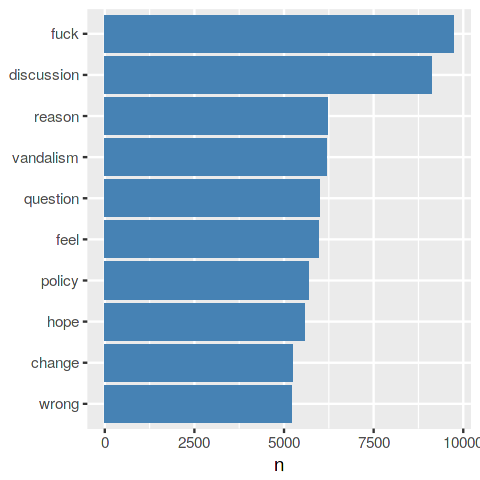

In [7]:
options(repr.plot.width=4,repr.plot.height=4)

#Remove stop words
data(stop_words)
word <- c("links","comments","person","personal","removed","stop","comment","2","1","comment","http","free","blocked","block","editors","note","wikipedia","page","article","talk","edit","people","articles","time","information","deletion","sources","pages","source","editing","section","user","edits","wiki","deleted","add","image","link","list","read","content","utc","history","added")
exter_stopwords<-as.data.frame(word)
tidy_text_nonstops <- tidy_text %>%
    anti_join(stop_words) %>% anti_join(exter_stopwords)

#Plot ten top words
tidy_text_nonstops %>%
    count(word,sort = TRUE) %>%
    head(10) %>%
    mutate(word = reorder(word,n)) %>%
    ggplot(aes(word,n)) +
    geom_col(fill="steelblue") +
    xlab(NULL) +
    coord_flip()

In [8]:
options(repr.plot.width = 7, repr.plot.height = 6)

#Build a frequency table that contains comments of all 6 classes
toxic_comments <- bind_rows(tidy_text_nonstops %>% filter(toxic == 1) %>% select(id,word) %>%
                            count(word,sort=TRUE) %>% mutate(classification = "toxic"),
            tidy_text_nonstops %>% filter(severe_toxic ==1) %>% select(id,word) %>%
                            count(word,sort=TRUE) %>% mutate(classification = "severe_toxic"),
            tidy_text_nonstops %>% filter(obscene == 1)%>% select(id,word) %>%
                            count(word,sort=TRUE) %>% mutate(classification = "obscene"),
            tidy_text_nonstops %>% filter(threat == 1) %>% select(id,word) %>%
                            count(word,sort=TRUE) %>% mutate(classification = "threat"),
            tidy_text_nonstops %>% filter(insult == 1) %>% select(id,word) %>%
                            count(word,sort =TRUE) %>% mutate(classification="insult"),
            tidy_text_nonstops %>% filter(identity_hate ==1) %>% select(id,word) %>%
                            count(word,sort = TRUE) %>% mutate(classification="identity_hate")) %>%
            mutate(classification = as.factor(classification),words = as.factor(word)) %>% select(classification,word,n)


Selecting by n


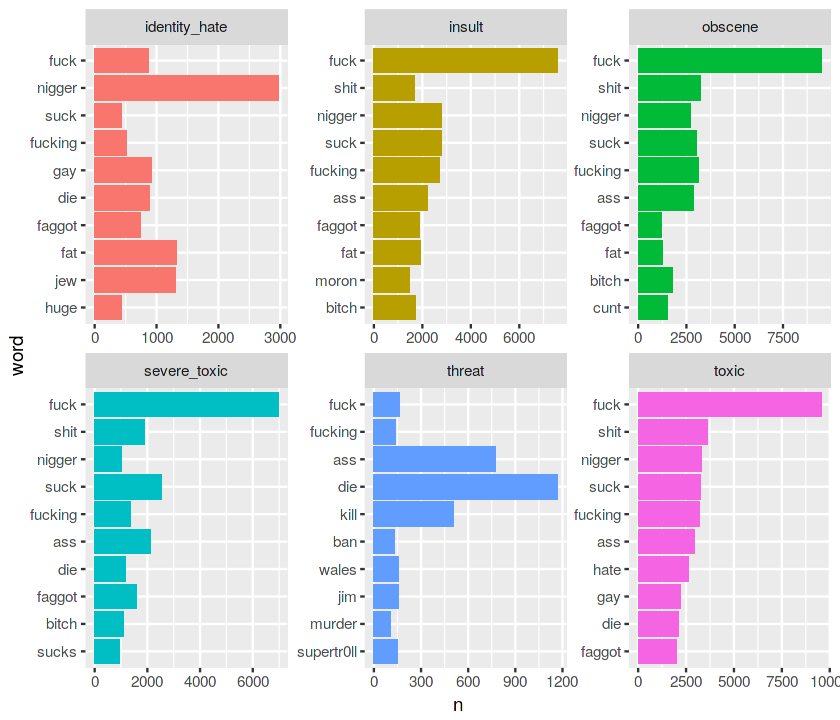

In [9]:
# Plot tops words by classification
toxic_comments %>%
   mutate(word = factor(word, levels = rev(unique(word)))) %>% 
  group_by(classification) %>%
  top_n(10) %>%
  ungroup  %>% 
  ggplot(aes(word, n, fill=classification)) +
    geom_bar(show.legend = FALSE, stat="identity") + coord_flip() +
 facet_wrap(~classification, scales="free")

[1] "Wordcloud for  toxic"

Selecting by n


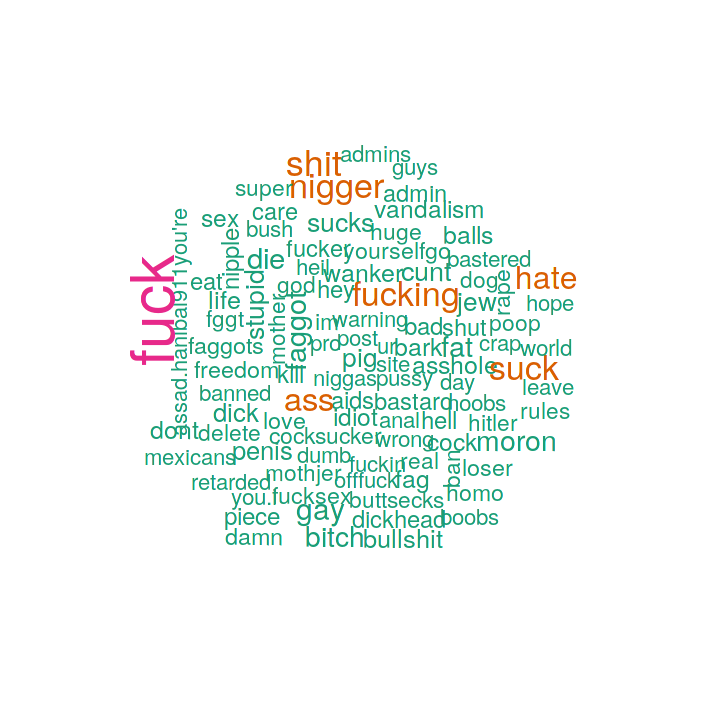

In [10]:
options(repr.plot.width=6,repr.plot.height=6)

#word clouds for classes
paste("Wordcloud for ",names(train_data)[3])
toxic_comments %>%
    filter(classification == names(train_data)[3]) %>%
    top_n(100) %>%
    with(wordcloud(word,n,min.freq = 5,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

[1] "Wordcloud for  severe_toxic"

Selecting by n


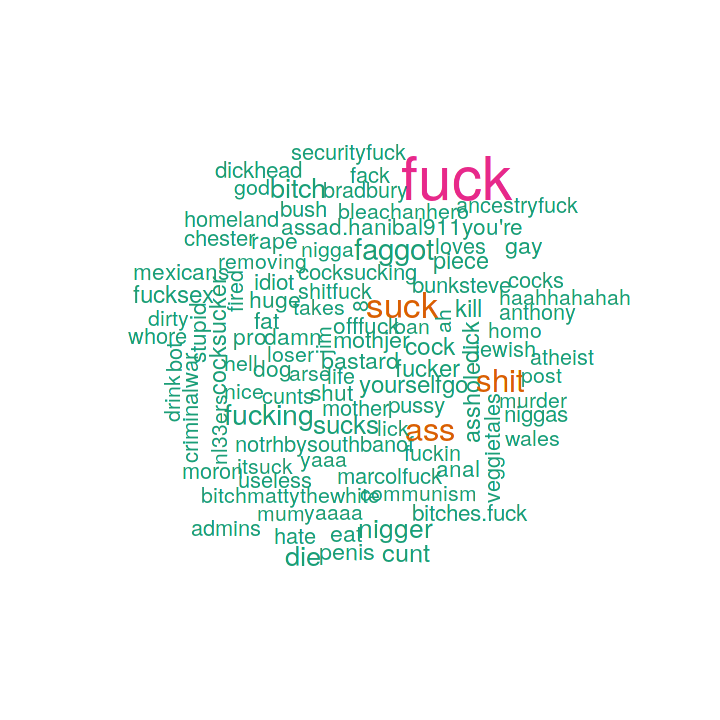

In [11]:
options(repr.plot.width=6,repr.plot.height=6)
paste("Wordcloud for ",names(train_data)[4])
toxic_comments %>%
    filter(classification == names(train_data)[4]) %>%
    top_n(100) %>%
    with(wordcloud(word,n,min.freq = 5,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

[1] "Wordcloud for  obscene"

Selecting by n


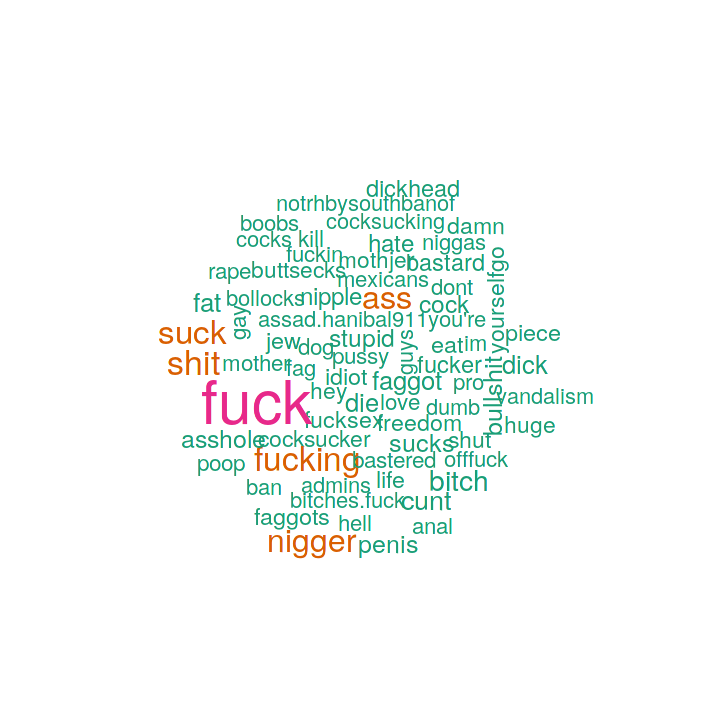

In [12]:
options(repr.plot.width=6,repr.plot.height =6)

paste("Wordcloud for ",names(train_data)[5])

toxic_comments %>%
    filter(classification == names(train_data)[5]) %>%
    top_n(70) %>%
    with(wordcloud(word,n,min.freq = 1,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

[1] "Wordcloud for  threat"

Selecting by n


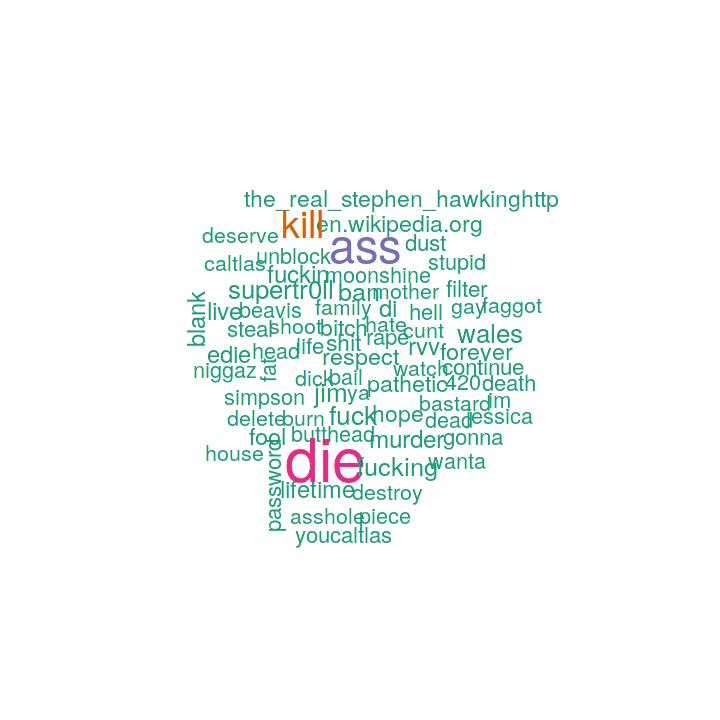

In [13]:
options(repr.plot.width=6,repr.plot.height =6)

paste("Wordcloud for ",names(train_data)[6])

toxic_comments %>%
    filter(classification == names(train_data)[6]) %>%
    top_n(70) %>%
    with(wordcloud(word,n,min.freq = 1,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

[1] "Wordcloud for  insult"

Selecting by n


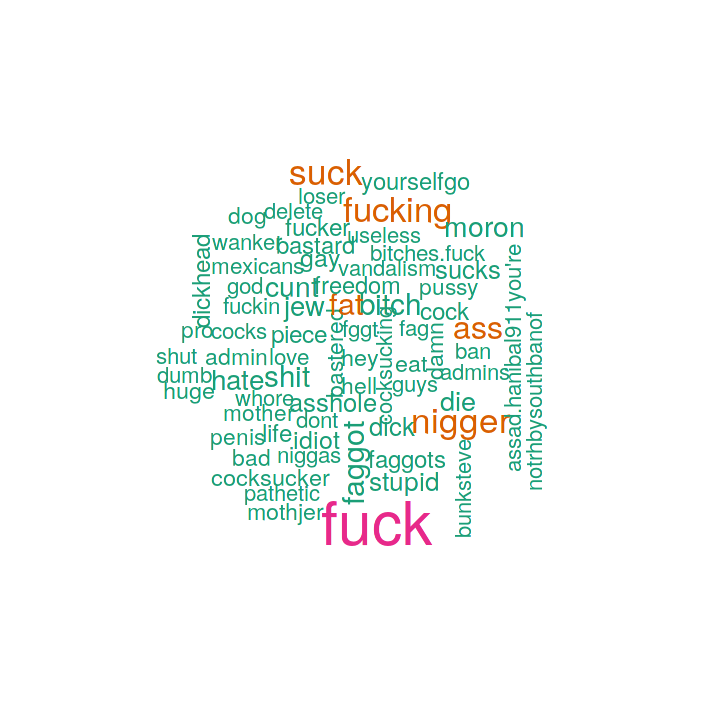

In [14]:
options(repr.plot.width=6,repr.plot.height =6)

paste("Wordcloud for ",names(train_data)[7])

toxic_comments %>%
    filter(classification == names(train_data)[7]) %>%
    top_n(70) %>%
    with(wordcloud(word,n,min.freq = 1,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

[1] "Wordcloud for  identity_hate"

Selecting by n


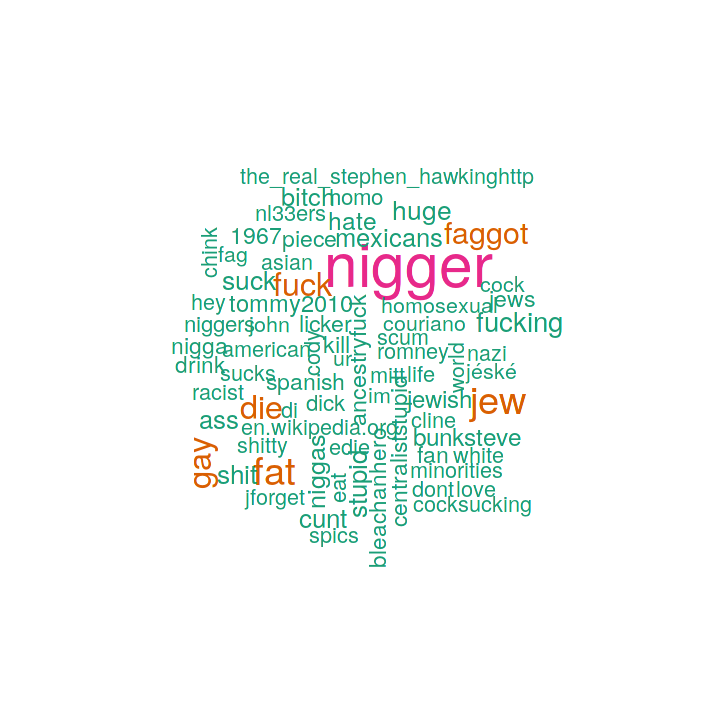

In [15]:
options(repr.plot.width=6,repr.plot.height =6)

paste("Wordcloud for ",names(train_data)[8])

toxic_comments %>%
    filter(classification == names(train_data)[8]) %>%
    top_n(70) %>%
    with(wordcloud(word,n,min.freq = 1,scale = c(3,1),colors = brewer.pal(4,"Dark2")))

In [16]:
#correlation between each class
cor(train_data[,3:8])

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.0000000,0.3086191,0.6765145,0.1570584,0.6475181,0.2660094
severe_toxic,0.3086191,1.0000000,0.4030145,0.1236013,0.3758072,0.2016002
obscene,0.6765145,0.4030145,1.0000000,0.1411790,0.7412724,0.2868669
threat,0.1570584,0.1236013,0.1411790,1.0000000,0.1500224,0.1151283
insult,0.6475181,0.3758072,0.7412724,0.1500224,1.0000000,0.3377363
identity_hate,0.2660094,0.2016002,0.2868669,0.1151283,0.3377363,1.0000000


In [17]:
wordseq = text_tokenizer(num_words = max_words) %>%
        fit_text_tokenizer(c(train_data$comment_text,test_data$comment_text))

In [18]:
#word dictionary
word_index = wordseq$word_index

x_train = texts_to_sequences(wordseq, train_data$comment_text ) %>%
        pad_sequences( maxlen = maxl)
y_train = as.matrix(train_data[,3:8])

x_test = texts_to_sequences(wordseq, test_data$comment_text ) %>%
        pad_sequences( maxlen = maxl)

In [19]:
wgt = fread("../input/glove840b300dtxt/glove.840B.300d.txt", data.table = FALSE)  %>%
        rename(word=V1)  %>%
        mutate(word=gsub("[[:punct:]]"," ", rm_white(word) ))

Read 2156853 rows and 301 (of 301) columns from 5.258 GB file in 00:02:17


In [20]:
#try to split into validation and train
# Shuffle observations   
set.seed(484)
indices <- sample(1:dim(x_train)[1])    
# Split into training and validation sample
prop_train <- .85
train_indices <- 1: round(prop_train*dim(x_train)[1], 0)
val_indices <-  (round(prop_train*dim(x_train)[1], 0)+1) : dim(x_train)[1]
    
x_tr <- x_train[indices[train_indices], ]    
y_tr <- y_train[indices[train_indices], ]
    
x_val <- x_train[indices[val_indices], ]    
y_val <-  y_train[indices[val_indices], ]
y_tr <- as.matrix(y_tr)
y_val <- as.matrix(y_val)

In [21]:
text_val = train_data[indices[val_indices],]
head(text_val)

id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
519c6edce06e329b,Statement I have learned for myself that your beliefs are not true.,0,0,0,0,0,0
769779f022404795,"Dude. You TOTALLY misunderstood what I said. I said i made the account DavidJac123, to be part of the debate, instead of using my IP. I did not say I am Akuri - cause i am not. You misunderstood what i said lol. Just wanted to correct the misunderstanding before everything goes too wild. Anyway I am sorry )",0,0,0,0,0,0
01fb5b0525dd9b05,"Muslim Men Harassment of MM page It is amazing how three muslim men jumped all over this page, right after I added a number of things (30 minutes after - all three men, all muslims), and cleaned it up. Does a woman working for human rights in Pakistan really get under your skin so badly? Wow. So sweetie, if you are so bloody busy, why not get busy, and stop harassing the women? Are you *that* threatened?",1,0,0,0,0,0
e99b4aebab1498f2,""" ===== re: Asma Mohammad Rafi So why did you revert to a version that includes """"Asma is the ugly daughter of an Arabic Omani singer Mohammed Rafi."""" ? I think you're the vandal here. - """,0,0,0,0,0,0
1654d247484625bc,"Fair use rationale for Image:Unsui.gif :Image:Unsui.gif is being used on this article. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in this Wikipedia article constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use. Please go to the image description page and edit it to include a fair use rationale. Using one of the templates at Wikipedia:Fair use rationale guideline is an easy way to insure that your image is in compliance with Wikipedia policy, but remember that you must complete the template. Do not simply insert a blank template on an image page. If there is other fair use media, consider checking that you have specified the fair use rationale on the other images used on this page. Note that any fair use images lacking such an explanation can be deleted one week after being tagged, as described on criteria for speedy deletion. If you have any questions please ask them at the Media copyright questions page. Thank you. Fair use rationale for Image:Watt.gif :Image:Watt.gif is being used on this article. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in this Wikipedia article constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use. Please go to the image description page and edit it to include a fair use rationale. Using one of the templates at Wikipedia:Fair use rationale guideline is an easy way to insure that your image is in compliance with Wikipedia policy, but remember that you must complete the template. Do not simply insert a blank template on an image page. If there is other fair use media, consider checking that you have specified the fair use rationale on the other images used on this page. Note that any fair use images lacking such an explanation can be deleted one week after being tagged, as described on criteria for speedy deletion. If you have any questions please ask them at the Media copyright questions page. Thank you. Fair use rationale for Image:Agon.gif :Image:Agon.gif is being used on this article. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in this Wikipedia article constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale

In [22]:
dic_words = wgt$word
wordindex = unlist(wordseq$word_index)

dic = data.frame(word=names(wordindex), key = wordindex,row.names = NULL) %>%
        arrange(key) %>% 
        .[1:max_words,]

w_embed = dic %>% 
        left_join(wgt)

J = ncol(w_embed)
ndim = J-2
w_embed = w_embed [1:(max_words-1),3:J] %>%
        mutate_all(as.numeric) %>%
        mutate_all(round,6) %>%
        #fill na with 0
        mutate_all(funs(replace(., is.na(.), 0))) 

colnames(w_embed) = paste0("V",1:ndim)
w_embed = rbind(rep(0, ndim), w_embed) %>%
        as.matrix()

Joining, by = "word"
Warning message:
“Column `word` joining factor and character vector, coercing into character vector”

In [23]:
w_embed = list(array(w_embed , c(max_words, ndim)))

**Embeddings**
![image.png](https://qph.fs.quoracdn.net/main-qimg-e8b83b14d7261d75754a92d0d3605e36)

Recurrent Neuronal Netowork
![image.png](http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg)

LSTM
![lstm](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)

Convolutional Neural Network
![image.png](https://image.slidesharecdn.com/dlsl2017d2l3recurrentneuralnetworksii-170125171005/95/recurrent-neural-networks-ii-d2l3-deep-learning-for-speech-and-language-upc-2017-12-638.jpg?cb=1485365099)

In [24]:
inp = layer_input(shape = list(maxl),
                  dtype = "int32", name = "input")
emm = inp %>%
        layer_embedding(input_dim = max_words, output_dim = ndim, input_length = maxl, weights = w_embed, trainable=FALSE) 
model = emm %>%
        layer_spatial_dropout_1d(rate=0.1) %>%
        bidirectional( #hyperparameter: how many layers
                layer_gru(units = 40, #hyperparameter
                          return_sequences = TRUE, 
                          recurrent_dropout = 0.1) 
        ) %>% 
       layer_conv_1d( #hyperparameter: how many layers
            60, #hyperparameter
            3, #hyperparameter
            padding = "valid",
            activation = "relu",
            strides = 1
          ) 

max_pool = model %>% layer_global_max_pooling_1d()
ave_pool = model %>% layer_global_average_pooling_1d()

outp = layer_concatenate(list(ave_pool, max_pool)) %>%
        layer_dense(units = 6, activation = "sigmoid")

model = keras_model(inp, outp)

model %>% compile(
        optimizer = "adam",
        loss = "binary_crossentropy",
        metrics = c("acc")
)

**Binary cross entropy**
![image.png](https://cdn-images-1.medium.com/max/1164/1*PK0iVgkQepmVCprtTgbsGg.png)

In [25]:
history = model %>% fit(
        x_tr, y_tr,
        epochs = 2,
        batch_size = 32,
        #validation_split = 0.05,
        validation_data = list(x_val,y_val),
        callbacks = list(
                callback_model_checkpoint(paste0("toxic_comment_model.h5"), save_best_only = TRUE),
                callback_early_stopping(monitor = "val_loss", min_delta = 0, patience = 0,
                                        verbose = 0, mode = c("auto", "min", "max"))
        )
)

In [26]:
model = load_model_hdf5(paste0("toxic_comment_model.h5"))
yhat_val  = model %>%
        predict(x_val, batch_size = 1024) %>%
        as.data.frame()
print(dim(yhat_val))

[1] 23936     6


In [37]:
y_yval = as.data.frame(y_val) #data frame
th = 0.5#the threshhold, if bigger take as prediction
classid = 1
#head(text_val[which(y_yval[1]>th),])#true toxic comments
#head(text_val[which(yhat_val[1]>th),])#predicted toxic comments
print(paste0("False positives for class: ",classes[classid]))
head(text_val[which(yhat_val[classid]>th & y_yval[classid]<th),])#predicted but not toxic comments

[1] "False positives for class: toxic"


id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
d610b5073907e06b,"See? He understands, and doesn't want interference or any trouble. He even censored my comments to toe the Party Line at Wikipedia. Leave him alone. Blame me, block me. I have other accounts. to administrators Do not block Haber! Bock Localzuk and/or me. Localzuk is a worthless fucking tool who is gunning for admin by being a hardass about rules and kicking a guy while he's down. He's also a child. Any adult would have refuted my claims of his childhood. Haber represents a minority opinion, but an important one, and he is particularly articulate. Leave him alone! He hasn't hurt anyone! Block my account if you must, as it doesn't matter, but I will fight to the last to defend this Wiki, which is supposed to be a fre exchange of ideas.",0,0,0,0,0,0
e9c555c06b34680d,OMG I JUST FOUND OUT YOUR INDIAN!!!!!! I LIKE CURRYYY AND INDIAN PEOPLE LOLOLOL!!!!!!! THEY FIX MY COMPUTER! LOLOLOLOLOLOL,0,0,0,0,0,0
559a4c7d5f2addc8,"Urgent complain - Wikipedia Answer given by you shows that you and whoever associated with WikipediaBold text don't care for the authenticity of the content displayed to the public. It's unfair and very disgusting that you folks are not taking this article or others linked to it directly or indirectly false. Give me your instant contact so that I could in detail talk to you. Because as memeber of your site, it's a right to ask you what the hell is going on.",0,0,0,0,0,0
8b69162649f63eb8,add condoms manufacture add condoms manufacturing to this article,0,0,0,0,0,0
3bc79ab5848d7d9d,Showed... ...Another homo bites the dust,0,0,0,0,1,1
b17ea6a08da1bb6a,"Slot screw Form of a screw fastener head. Rather than slit, or?",0,0,0,0,0,0


In [38]:

print(paste0("False negatives for class: ",classes[classid]))
head(text_val[which(yhat_val[classid]<th & y_yval[classid]>th),])#not predicted but toxic comments

[1] "False negatives for class: toxic"


id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
e7a09a04eb831d30,Current event???? wtf is the current event about?,1,0,1,0,0,0
ba8ea4c4f01b0f14,""" THE USED WORDS OPENLY MAKE THIS ARTICLE A VERY BIASED ONE I would like the person who wrote the line that """"an increasing number(!) of Turkish intellectuals"""" support the genocide THAT HE SHOW SOME REFERENCE and PROOF. Also the SO-CALLED fact that over a million Armenians are killed IS A VERY DUBIOUS ONE AND REQUIRES SOME PROOF. WHAT MAKES WIKIPEDIA, WIKIPEDIA IS THE FACT THAT EVEN IN THE CASE OF A TRAGEDY AS IMMENSE AS 9/11, IT PRESERVES ITS NEUTRALITY. HOW CAN YOU CALL THIS ARTICLE NEUTRAL IF IT SMELLS HEAVILY BIASED? For example the VERY IMPORTANT START PARAPGRAPH SHOULD BE MODIFIED LIKE , SAY """" It is also alleged that over a million Armenians were killed during the relocation etc...."""" OTHERWISE; you have to show immediate references or supporting articles, proofs etc. I would like to receive those proofs, if this is really a documented proof, I very much would like to read them. PLEASE REFER TO SOME RESPECTED ENCYCLOPEDIA LIKE BRITTANICA ABOUT THE SO-CALLED ARMENIAN GENOCIDE, TO SEE WHAT NEUTRALITY REALLY MEANS ! No academic research , conducted in Turkish Republic, ever denies the fact that """"MANY"""" Armenians were killed during the relocation but """"A MILLION"""" IS REALLY A BAD EXAGGERATE. Just because there are some PUNKS ( Do they call themselves System of Something? ) who make their homeland's propaganda, does not mean that you can falsify the history. PLEASE REFER TO THE RESPECTED HISTORIANS( MANY OF THEM ARE NOT TURKISH) WHO DENY THE SO-CALLED GENOCIDE... I WOULD LIKE THE PEOPLE WHO CONTROL THIS SITE, CHANGE THESE BIASED LINES IMMEDIATELY. User:SokratesKerem""",1,0,0,0,0,0
8ff7750ba1e8ee9e,"1. correct 2. pertinent 3. done in good faith. So if you are now affronted by my response, it only serves to prove what a thin-skinnned hypocrite you really are. 81.132.173.128",1,0,0,0,0,0
54d6c653ef874510,""" What a twit. Hopefully he tires soon. (talk) """,1,0,0,0,0,0
7b72d20b1b0fc864,very short and very clear slaves - to gas chambers.,1,0,0,0,0,0
f61304d49ac6660f,Stop Stop creating nonsens pages. (Talk),1,0,0,0,0,0


In [39]:
print(paste0("True positives for class: ",classes[classid]))
head(text_val[which(yhat_val[classid]>th & y_yval[classid]>th),])# predicted and true toxic comments

[1] "True positives for class: toxic"


id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
01fb5b0525dd9b05,"Muslim Men Harassment of MM page It is amazing how three muslim men jumped all over this page, right after I added a number of things (30 minutes after - all three men, all muslims), and cleaned it up. Does a woman working for human rights in Pakistan really get under your skin so badly? Wow. So sweetie, if you are so bloody busy, why not get busy, and stop harassing the women? Are you *that* threatened?",1,0,0,0,0,0
ec06d5ac552c9836,east hanning feild is gay,1,0,0,0,0,0
97745af62f9b5f05,is a cocksucker faggot D,1,1,1,0,1,0
d7aa8e040eb9a9fa,"""Edited to Add: Quoting your previous post: """"While you probably didn't intend any offense"""" And responding: Fuck, yeah, I intended offense. Your officious assholish attitude is highly offensive to me. I REALLY INTENDED TO OFFEND YOU, asswipe. If I didn't succeed in pissing you off and offending you then I failed. Bite me, moron. """,1,0,1,0,1,0
495de8b41ff51c02,Boy Scout You boy scout faggot. I bet you like mormon jizz all over your face,1,0,1,0,1,0
e4cd5538812fb507,that was bullpoop. whats ur problem?? freak.,1,0,1,0,1,0


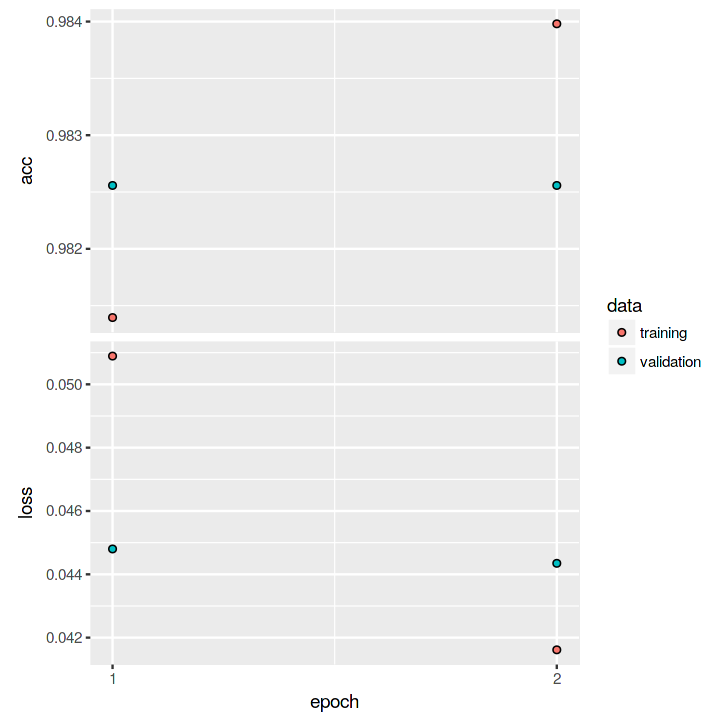

In [30]:
plot(history)

In [35]:
aucrocResults <- function(y,y_,classes){
    i <- 1
    auct <- 0
    for(cl in classes){
        pred <- prediction(y[i], y_[i])#just first prediction
        perf <- performance(pred, measure = "tpr", x.measure = "fpr")
        # I know, the following code is bizarre. Just go with it.
        auc <- performance(pred, measure = "auc")
        auc <- auc@y.values[[1]]        
        print(c( cl,  "AUC=", auc))
        auct <- auct + auc
        i <- i + 1
    }
    print(c("total AUC=",auct/(i-1)))
}
classes = c("toxic", "severe_toxic", "obscene", "threat","insult", "identity_hate")
aucrocResults(yhat_val, y_yval, classes)#save the output into the spreadsheet on google drive!!!

[1] "toxic"            "AUC="             "0.98003315300086"
[1] "severe_toxic"      "AUC="              "0.991131212424665"
[1] "obscene"           "AUC="              "0.990550314872419"
[1] "threat"           "AUC="             "0.99118024752023"
[1] "insult"            "AUC="              "0.984963247463205"
[1] "identity_hate"    "AUC="             "0.98487529433075"
[1] "total AUC="        "0.987122244935355"


The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1 − specificity). 
![image.png](http://algolytics.com/wp-content/uploads/2018/05/roc1_en.png)

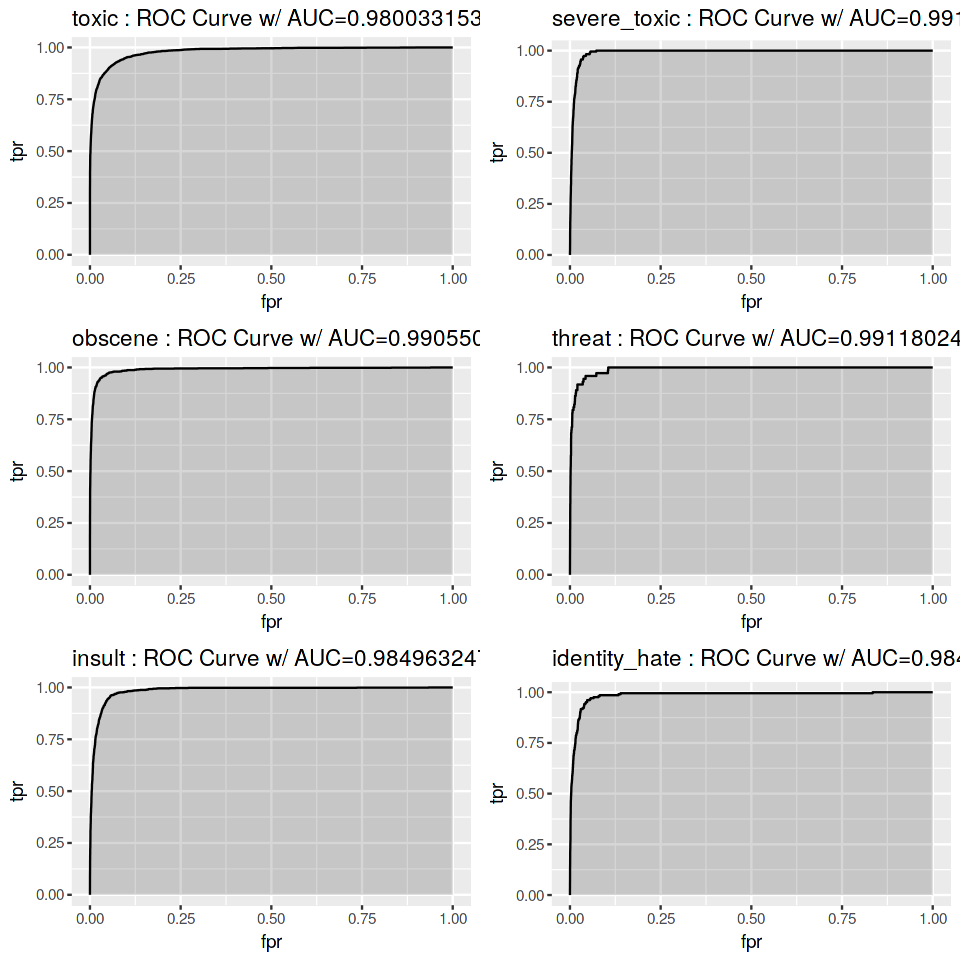

In [71]:
options(repr.plot.width=8,repr.plot.height=8)
plotauc <- function(cl){
    #cl = 1# classid
    pred <- prediction(yhat_val[cl], y_yval[cl])#just first class
    perf <- performance(pred, measure = "tpr", x.measure = "fpr")
    # I know, the following code is bizarre. Just go with it.
    auc <- performance(pred, measure = "auc")
    auc <- auc@y.values[[1]]

    roc.data <- data.frame(fpr=unlist(perf@x.values),
     tpr=unlist(perf@y.values),
     model="GLM")
    p1 <- ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
     geom_ribbon(alpha=0.2) +
     geom_line(aes(y=tpr)) +
     ggtitle(paste0(classes[cl]," : ROC Curve w/ AUC=", auc))
    p1
    }
p  = list()
for(i in 1:6) {
    p[[i]] = plotauc(i)
    }
do.call(grid.arrange,p)

> Hyperparameters tuning

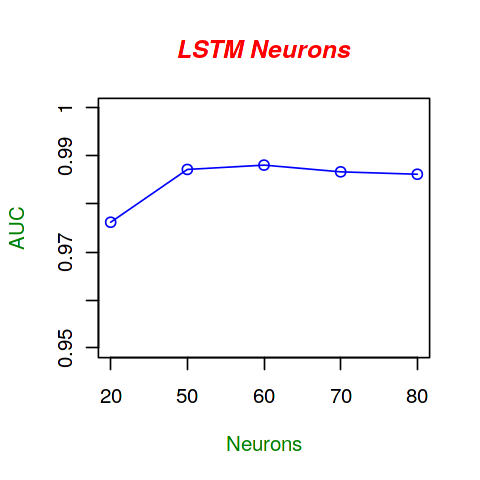

In [8]:
options(repr.plot.width=4,repr.plot.height=4)
aucs <- c(0.9762, 0.9872, 0.9881, 0.9867, 0.9862)

g_range <- range(0.95, 1)

plot(aucs, type="o", col="blue", ylim=g_range, 
   axes=FALSE, ann=FALSE)

axis(1, at=1:5, lab=c("20","50","60","70","80"))

ticks<-c(0.95,0.96,0.97,0.98,0.99,1)
axis(2,at=ticks,labels=ticks)
box()
title(main="LSTM Neurons", col.main="red", font.main=4)

title(xlab="Neurons", col.lab=rgb(0,0.5,0))
title(ylab="AUC", col.lab=rgb(0,0.5,0))


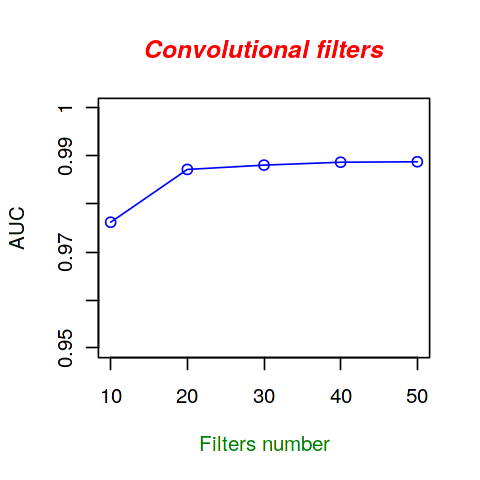

In [7]:
options(repr.plot.width=4,repr.plot.height=4)
aucs <- c(0.9762, 0.9872, 0.9881, 0.9887, 0.9888)

g_range <- range(0.95, 1)
plot(aucs, type="o", col="blue", ylim=g_range, 
   axes=FALSE, ann=FALSE)

axis(1, at=1:5, lab=c("10","20","30","40","50"))

ticks<-c(0.95,0.96,0.97,0.98,0.99,1)
axis(2,at=ticks,labels=ticks)

box()
title(main="Convolutional filters", col.main="red", font.main=4)

title(xlab="Filters number", col.lab=rgb(0,0.5,0))
title(ylab="AUC", col.lab=rgb(0,0.05,0))